In [1]:
import pandas as pd, numpy as np, seaborn as sns
from matplotlib import pyplot as plt, style

In [2]:
df = pd.read_csv("Data/house.csv")

In [3]:
df.head()

,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,Price
0,1790,2,2,2,No,East,114300
1,2030,4,2,3,No,East,114200
2,1740,3,2,1,No,East,114800
3,1980,3,2,3,No,East,94700
4,2130,3,3,3,No,East,119800


### Exploratory Data Analysis

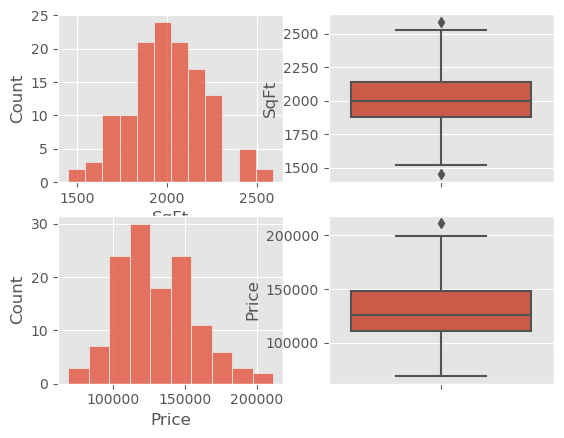

In [6]:
style.use('ggplot')
plt.subplot(2,2,1)
sns.histplot(data=df,x='SqFt')
plt.subplot(2,2,2)
sns.boxplot(data=df,y='SqFt')
plt.subplot(2,2,3)
sns.histplot(data=df,x='Price')
plt.subplot(2,2,4)
sns.boxplot(data=df,y='Price')
plt.show()

<Axes: xlabel='SqFt', ylabel='Price'>

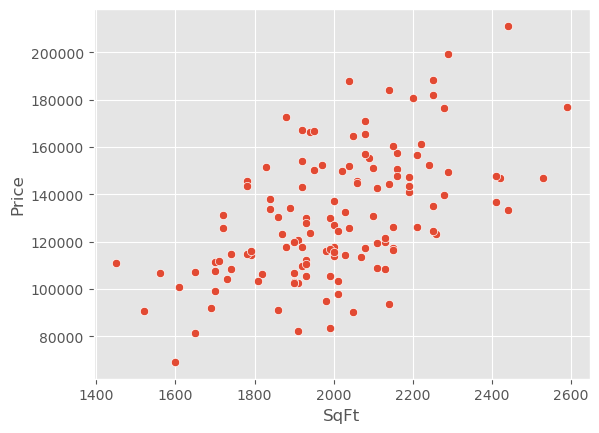

In [7]:
sns.scatterplot(data=df,x="SqFt",y="Price")

In [8]:
# separate features and output
x = df[["SqFt"]]
y = df['Price']

In [11]:
# split the data into train and test
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

# Build the model
from sklearn.linear_model import LinearRegression

# create an estimator object
model = LinearRegression()

# train the model
model.fit(x_train,y_train)

# print coef/ m values
model.coef_

# print intercept
model.intercept_

# use the model and get prediction
model.predict(x_train)

model.predict([[625]])

# check the accuracy of the model
model.score(x_train,y_train)

model.score(x_test,y_test)

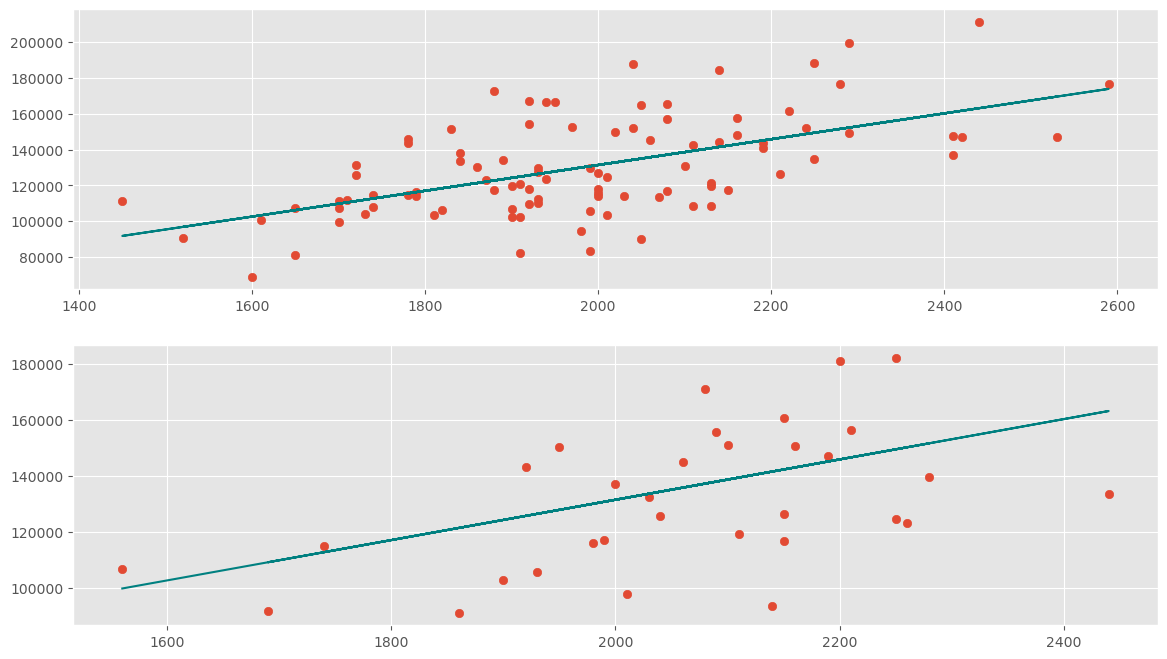

In [28]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
plt.figure(figsize=(14,8))
plt.subplot(2,1,1)
plt.scatter(x_train['SqFt'],y_train)
plt.plot(x_train['SqFt'],y_train_pred,color='teal')
plt.subplot(2,1,2)
plt.scatter(x_test['SqFt'],y_test)
plt.plot(x_test['SqFt'],y_test_pred,color='teal')
plt.show()

In [29]:
df.head()

,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,Price
0,1790,2,2,2,No,East,114300
1,2030,4,2,3,No,East,114200
2,1740,3,2,1,No,East,114800
3,1980,3,2,3,No,East,94700
4,2130,3,3,3,No,East,119800


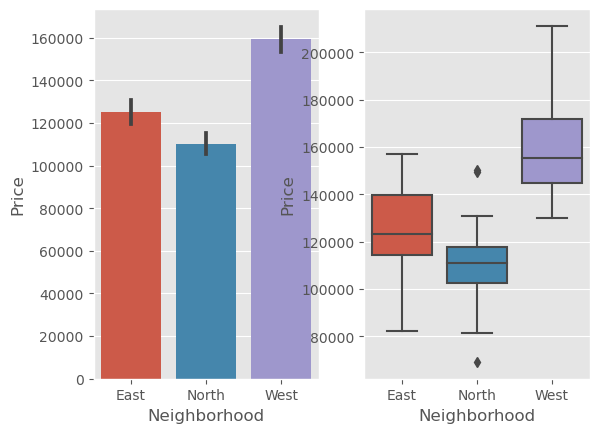

In [31]:
#check if Neighborhood has any impact on Price
plt.subplot(1,2,1)
sns.barplot(data=df,x="Neighborhood",y='Price')
plt.subplot(1,2,2)
sns.boxplot(data=df,x="Neighborhood",y='Price')
plt.show()

In [32]:
# Feature Encoding

In [37]:
df_dummy=pd.get_dummies(data=df,columns=['Brick','Neighborhood'],
               dtype=int,drop_first=True)

In [38]:
x = df_dummy.drop(columns="Price")
y = df_dummy['Price']

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [40]:
# Build the model

# create an estimator object
model = LinearRegression()

# train the model
model.fit(x_train,y_train)

LinearRegression()

In [41]:
# print coef/ m values
model.coef_

array([   52.61612815,  5087.65594203,  8622.23852423, -8191.28943499,
       16220.52416008,  1480.2392325 , 20948.60993449])

In [42]:
x_train.columns

Index(['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick_Yes',
       'Neighborhood_North', 'Neighborhood_West'],
      dtype='object')

In [43]:
# print intercept
model.intercept_

-2237.884042904756

In [44]:
model.predict([[1200,2,1,2,1,0,0]])

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([79536.96543296])

In [45]:
# check the accuracy of the model
model.score(x_train,y_train)

0.8697938712626112

In [46]:
model.score(x_test,y_test)

0.8582961043180666

In [47]:
x_train.columns

Index(['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick_Yes',
       'Neighborhood_North', 'Neighborhood_West'],
      dtype='object')

In [48]:
df_new = pd.read_csv("Data/house new data for pred.csv")

In [50]:
df_new_dummy = pd.get_dummies(df_new,columns=['Brick','Neighborhood'],dtype=int,drop_first=True)

In [51]:
df_new_dummy.columns

Index(['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick_Yes',
       'Neighborhood_North'],
      dtype='object')

In [52]:
df_new_dummy['Neighborhood_West']=0

In [53]:
model.predict(df_new_dummy)

array([104565.41587528, 108894.88284068, 134488.06545545])

In [72]:
import joblib
def predict_price(df):
    house_data=df.copy()
    model = joblib.load("housemodel.h5")
    model_columns= model.feature_names_in_
    
    house_data=pd.get_dummies(data=house_data,columns=['Brick','Neighborhood'],
                             dtype=int,drop_first=True)
    
    missing_columns = list(set(model_columns)-set(house_data.columns))
    for i in missing_columns:
        house_data[i]=0
    data=house_data[model_columns]
    pred = model.predict(data)
    return pred

In [60]:
model.predict(preprocess_house(df_new))

array([104565.41587528, 108894.88284068, 134488.06545545])

In [64]:
mydata = pd.DataFrame({'SqFt':[3000,],'Bedrooms':[4,],'Bathrooms':[3,],'Offers':[1,],
                      'Brick':["Yes",],'Neighborhood':['East',]})

In [65]:
mydata

,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,3000,4,3,1,Yes,East


In [66]:
model.predict(preprocess_house(mydata))

array([193636.55030661])

#### Saving the model

In [67]:
import joblib

In [68]:
joblib.dump(model,"housemodel.h5")

['housemodel.h5']

In [69]:
# load the model
hModel= joblib.load("housemodel.h5")

In [70]:
hModel.predict(preprocess_house(mydata))

array([193636.55030661])